In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
!ls

student.txt
student-mat.csv
student-merge.R
student-por.csv
Untitled.ipynb


In [3]:
df_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df_mat.shape

(649, 33)

In [18]:
y = df_mat["G3"]
X = df_mat.drop(labels=["G1", "G2", "G3"], axis=1)

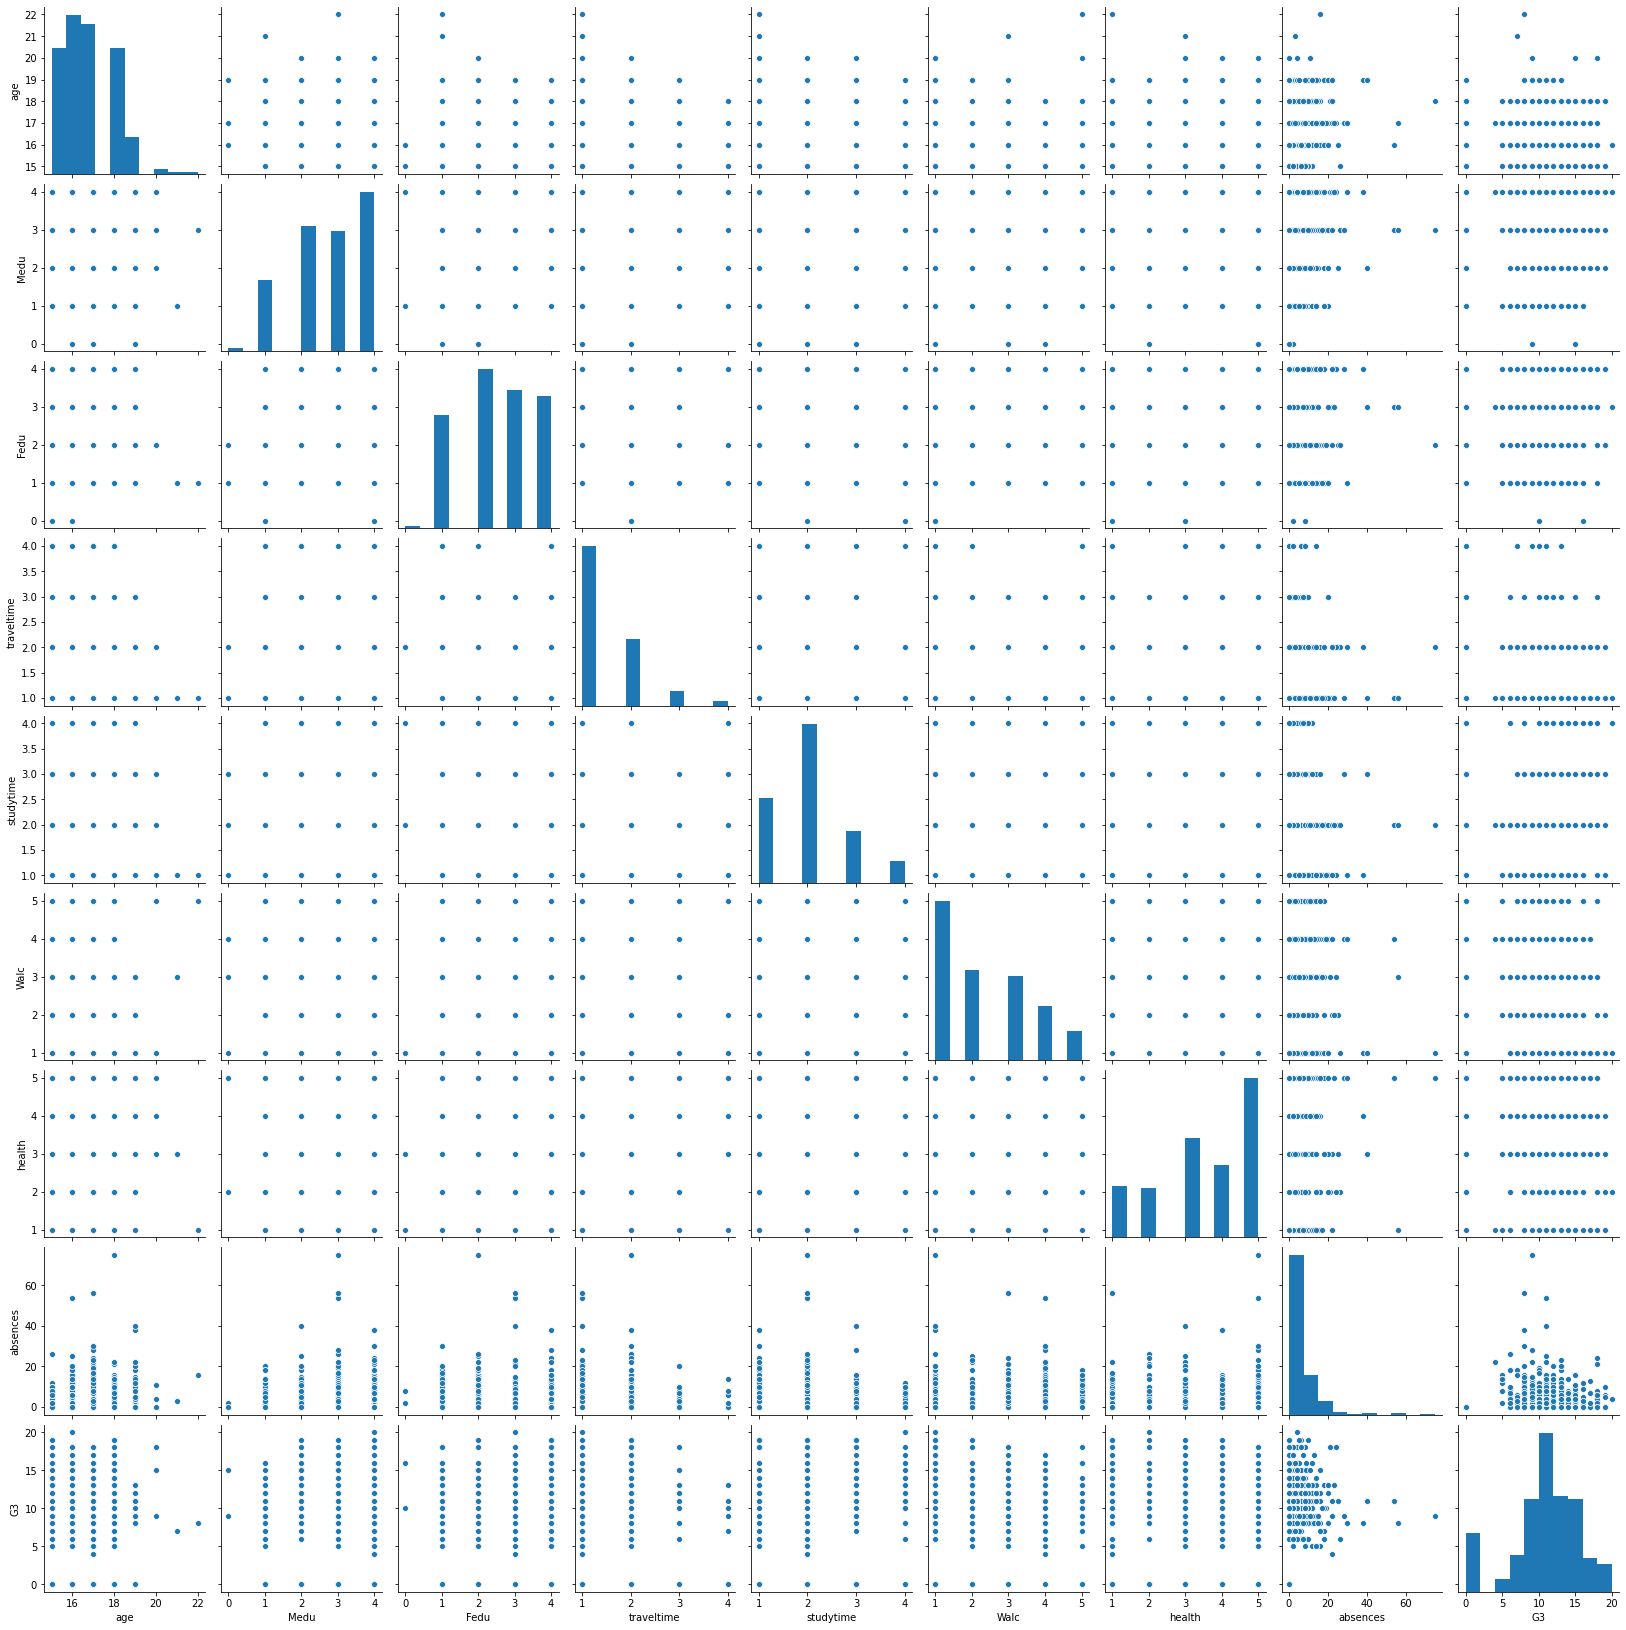

In [10]:
sns.pairplot(df_mat.drop(labels=["G1", 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', "G2"], axis=1))


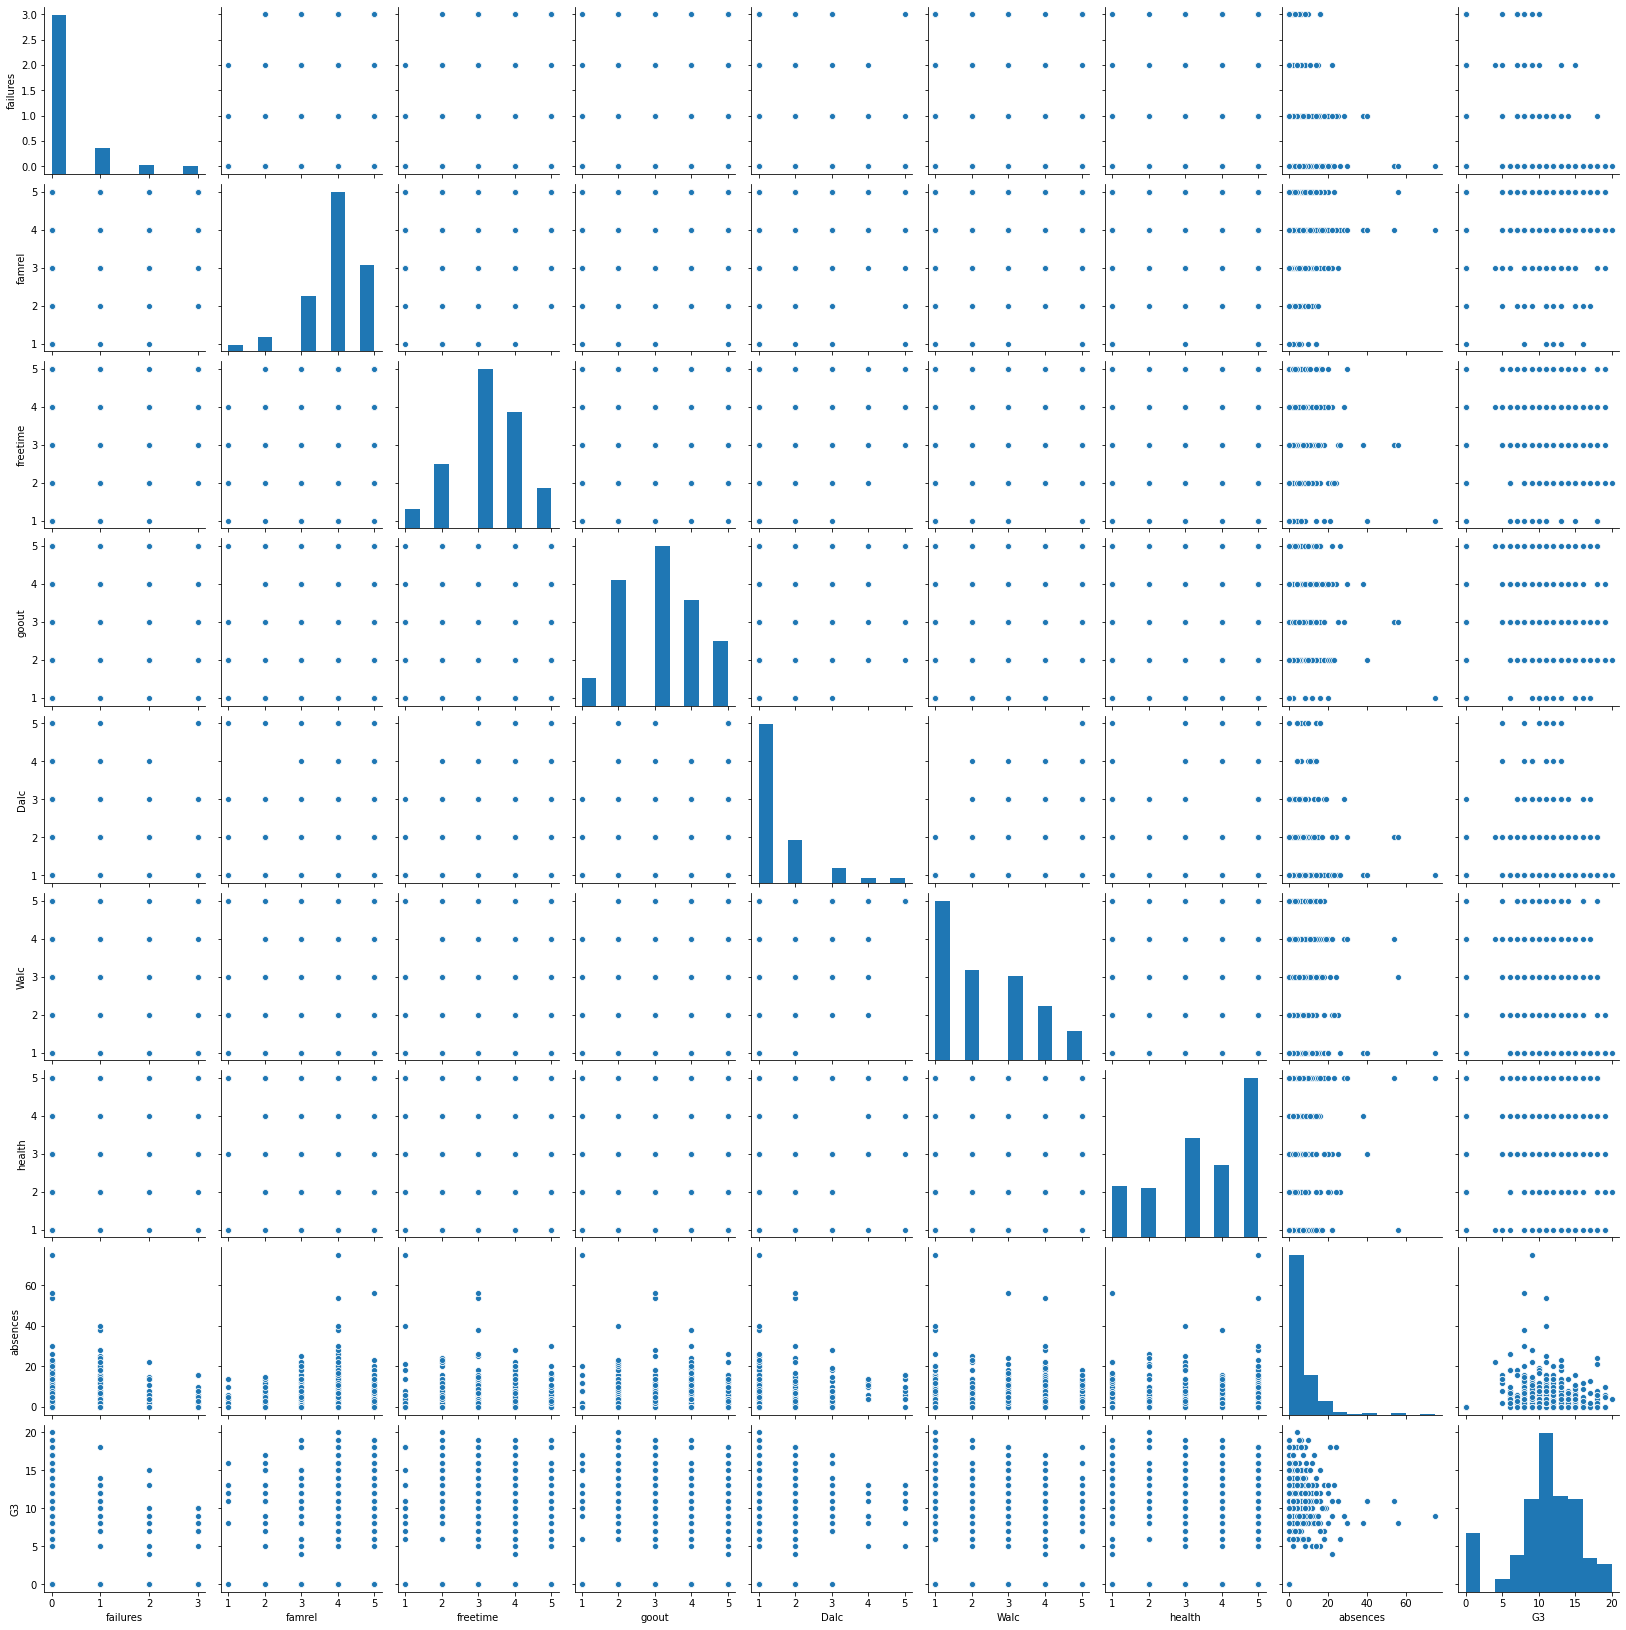

In [11]:
sns.pairplot(df_mat.drop(labels=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', "G1", "G2"], axis=1))

# Pairplot

- All discretes variables
- Grade seems "normally distributed" 
- No so much data
- Need encoding of text values

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X).categories_

[array(['GP', 'MS'], dtype=object),
 array(['F', 'M'], dtype=object),
 array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64),
 array(['R', 'U'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array([0, 1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['course', 'home', 'other', 'reputation'], dtype=object),
 array(['father', 'mother', 'other'], dtype=object),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array([1, 2, 3, 4, 

In [19]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, r2_score(expected, predicted)))

models = [
    RandomForestRegressor(n_estimators=100)
]


for model in models:
    score_model(X, y, model)

RandomForestRegressor: 0.8964090881261146


In [ ]:
Nice overfit

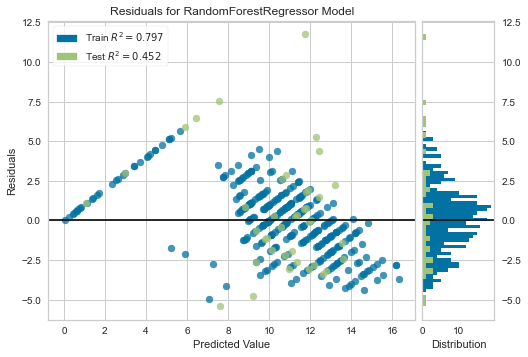

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ResidualsPlot(
        model
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.10)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  
    
    # Compute and return F1 (harmonic mean of precision and recall)
    #print("{}: {}".format(estimator.__class__.__name__, r2_score(expected, predicted)))

    
models = [
    RandomForestRegressor(n_estimators=100, ccp_alpha = 0.1)
]


for model in models:
    score_model(X, y, model)
    
    

about  500 grades

about 30 features

> overfitting

In [ ]:
ccp_alphas = [1, 10, 5, 0.5, 0.1, 1]

for ccp_alpha in ccp_alphas:
    models = [
        RandomForestRegressor(n_estimators=100, ccp_alpha = ccp_alpha)
    ]
    for model in models:
        print("cc alpha {} ".format(ccp_alpha))
        score_model(X, y, model)
    

cc alpha 1 


ValueError: Found unknown categories [21] in column 2 during transform